<a href="https://colab.research.google.com/github/Pooja-Pj205/Customer-Segmentation-Analysis/blob/main/Segment_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation Using K-means Clustering**


#**Understanding the data**

---
**Step1:**
So we are starting with importing the libraries like pandas,seaborn and matplotlib.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Step2:** We are creating a dataframe in pandas to read the csv dataset.



In [12]:
df=pd.read_csv('Mall_Customers.csv')


**Step3:**  With df.shape we can see how many rows and cols are there.


In [13]:
df.shape

(200, 5)

**Step4:** df.info() gives a basic info about the dataset like datatype ,null count.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Step5:** pandas provides us a unique method to retrieve the data from the dataset df.iloc() meth is used to extract cols by col_no.


In [5]:
x=df.iloc[:,[3,4]].values

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

#**Perform Elbow method**

---
***Elbow method***


*  it's a fundamental method for any unsupervised learning algorithm to determine the optimal number of clusters.(clusters to be used for customer segmentation)

*   Determines the optimal no.of k.


*   The inflection on curve helps to decide the optimal no.of clusters.(more cluster means better fit)













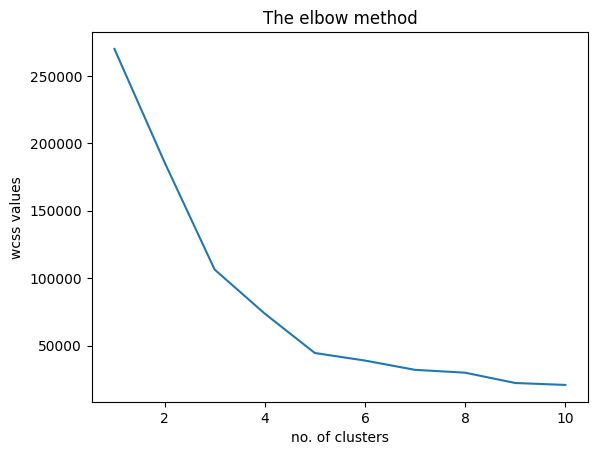

In [7]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss values')
plt.show()

In [8]:
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(x)

***K-means Clustering Algorithm***

It's a unsupervised learning algorithm which grooves the unlabeled datasets into clusters.The K here means the number of clusters to be derived from the dataset that too without any training.


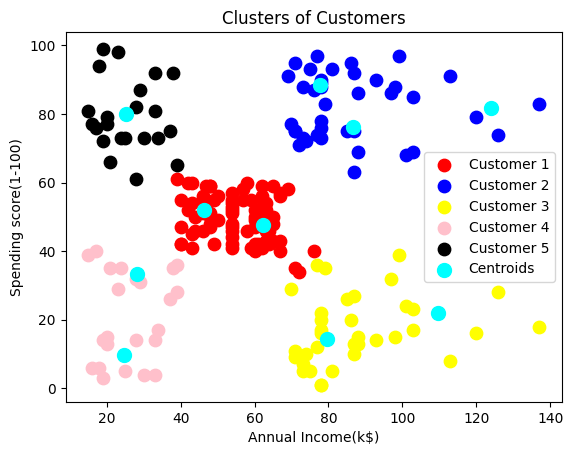

In [11]:
plt.scatter(x[y_kmeans ==0,0],x[y_kmeans ==0,1],s=80,c="red",label='Customer 1')
plt.scatter(x[y_kmeans ==1,0],x[y_kmeans ==1,1],s=80,c="blue",label='Customer 2')
plt.scatter(x[y_kmeans ==2,0],x[y_kmeans ==2,1],s=80,c="yellow",label='Customer 3')
plt.scatter(x[y_kmeans ==3,0],x[y_kmeans ==3,1],s=80,c="pink",label='Customer 4')
plt.scatter(x[y_kmeans ==4,0],x[y_kmeans ==4,1],s=80,c="black",label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='cyan',label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()